# Explore IGRA soundings (historical balloon data archives) 

## Data interpolated to 25mb levels

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
ds25 = xr.open_dataset('~/Box/MPO624_data/Ballons_Interpolated_AllLevelsObstimes.derived.25mb.INM00043003_BOMBAY.nc')
ds25

<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables: (12/25)
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 ...
    variables     (var) object ...
    units         (var) object ...
    release_time  (time) float64 ...
    PW            (time) float32 ...
    ...            ...
    LI            (time) float32 ...
    SI            (time) float32 ...
    KI            (time) float32 ...
    TTI           (time) float32 ...
    CAPE          (time) float32 ...
    CIN           (time) float32 ...

Text(0.5, 1.0, 'BOMBAY LNBPress')

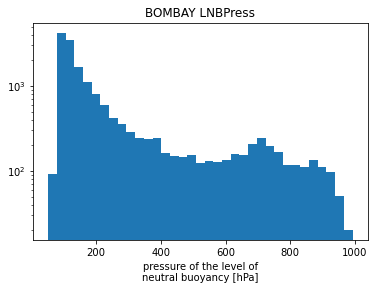

In [198]:
ds25.LNBPress.plot.hist(bins=35, log=True)
plt.title('BOMBAY LNBPress')

# Selecting seasons and epochs 
### xarray approach: convert time to datetime64 object 

In [201]:
# If I can just convert time to datetime64, all the tools of xarray will work
# great trick https://stackoverflow.com/questions/62572678/xarray-coords-conversion-to-datetime64
ds25['time2'] = pd.DatetimeIndex(ds25['time'].values)
ds25

<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19, time2: 31174)
Coordinates:
  * time          (time) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 197...
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * time2         (time2) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 19...
Data variables: (12/25)
    Data          (time, lev, var) float32 1e+03 126.0 127.0 ... 3.6 -4.7 nan
    InterpLevNum  (time) float64 8.0 6.0 9.0 8.0 9.0 ... 54.0 55.0 54.0 50.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.108e+03 2.337e+03 1.108e+03
    PW            (time) float32 nan nan nan nan nan ... 52.54 53.55 53.01 58.93
    ...            ...
    LI            (time) float32 2.0 nan -1.0 nan -8.0 ... -3.0 -5.0 -3.0 -4.0
    SI            (time) float32 -1.0 nan nan nan -5.0 ... 1.0 2.0 0.0 1.0 3.0
    KI            (time) float32 31.0 nan nan nan 33.0 ... 22.0 24.0 27.0 34.0
    TTI           (time) float32 46.0 nan nan nan 53.0 ... 38.0 41.0 40.0 37.0
    CAPE          (time) float32 nan nan nan ... 4.069e+03 2.594e+03 4.32e+03
    CIN           (time) float32 nan nan nan nan nan ... 0.0 0.0 0.0 -1.0 0.0

In [208]:
ds25.sel(lev=1000)  ## Why can I select by lev, but not by time?? GRR

<xarray.Dataset>
Dimensions:       (time: 31174, var: 19, time2: 31174)
Coordinates:
  * time          (time) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 197...
    lev           float32 1e+03
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * time2         (time2) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 19...
Data variables: (12/25)
    Data          (time, var) float32 1e+03 126.0 127.0 296.4 ... -0.4 0.6 38.4
    InterpLevNum  (time) float64 8.0 6.0 9.0 8.0 9.0 ... 54.0 55.0 54.0 50.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.108e+03 2.337e+03 1.108e+03
    PW            (time) float32 nan nan nan nan nan ... 52.54 53.55 53.01 58.93
    ...            ...
    LI            (time) float32 2.0 nan -1.0 nan -8.0 ... -3.0 -5.0 -3.0 -4.0
    SI            (time) float32 -1.0 nan nan nan -5.0 ... 1.0 2.0 0.0 1.0 3.0
    KI            (time) float32 31.0 nan nan nan 33.0 ... 22.0 24.0 27.0 34.0
    TTI           (time) float32 46.0 nan nan nan 53.0 ... 38.0 41.0 40.0 37.0
    CAPE          (time) float32 nan nan nan ... 4.069e+03 2.594e+03 4.32e+03
    CIN           (time) float32 nan nan nan nan nan ... 0.0 0.0 0.0 -1.0 0.0

In [203]:
t64 = ds25.time
t64

<xarray.DataArray 'time' (time: 31174)>
array(['1970-01-01T00:00:01.955011715', '1970-01-01T00:00:01.955020615',
       '1970-01-01T00:00:01.955021715', ..., '1970-01-01T00:00:02.019081212',
       '1970-01-01T00:00:02.019081300', '1970-01-01T00:00:02.019081312'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 1970-01-...

In [207]:
ds25.sel(lev=1000)

<xarray.Dataset>
Dimensions:       (time: 31174, var: 19, time2: 31174)
Coordinates:
  * time          (time) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 197...
    lev           float32 1e+03
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * time2         (time2) datetime64[ns] 1970-01-01T00:00:01.955011715 ... 19...
Data variables: (12/25)
    Data          (time, var) float32 1e+03 126.0 127.0 296.4 ... -0.4 0.6 38.4
    InterpLevNum  (time) float64 8.0 6.0 9.0 8.0 9.0 ... 54.0 55.0 54.0 50.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.108e+03 2.337e+03 1.108e+03
    PW            (time) float32 nan nan nan nan nan ... 52.54 53.55 53.01 58.93
    ...            ...
    LI            (time) float32 2.0 nan -1.0 nan -8.0 ... -3.0 -5.0 -3.0 -4.0
    SI            (time) float32 -1.0 nan nan nan -5.0 ... 1.0 2.0 0.0 1.0 3.0
    KI            (time) float32 31.0 nan nan nan 33.0 ... 22.0 24.0 27.0 34.0
    TTI           (time) float32 46.0 nan nan nan 53.0 ... 38.0 41.0 40.0 37.0
    CAPE          (time) float32 nan nan nan ... 4.069e+03 2.594e+03 4.32e+03
    CIN           (time) float32 nan nan nan nan nan ... 0.0 0.0 0.0 -1.0 0.0

### Traditional approach: get some time handles as strings, for subsetting

In [7]:
# Create year, month, day, hour time lists for subsetting
# Get the date as a string from an integer, not a float number
date = ds25.time.values.astype('int').astype('str')

# print(date[0]) # 1947060715

# Extract characters: Brackets create a list of one element from date[0]
yyyy = [date[0][0:4]]
mm = [date[0][4:6]]
dd = [date[0][6:8]]
hh = [date[0][8:10]]

# Lists are appended for all the other elements of date array 
for i in range(len(date)-1): 
    yyyy.append(date[i+1][0:4])
    mm.append(date[i+1][4:6])
    dd.append(date[i+1][6:8])
    hh.append(date[i+1][8:10])
    
# mm  # a list of strings 

In [55]:
month = ds25.time.astype(int)%1000000
month

<xarray.DataArray 'time' (time: 31174)>
array([11715, 20615, 21715, ..., 81212, 81300, 81312])
Coordinates:
  * time     (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09

In [79]:
mm = ds25.time.astype(int).astype(str).str.slice(start=4, stop=6)
mm

<xarray.DataArray 'time' (time: 31174)>
array(['01', '02', '02', ..., '08', '08', '08'], dtype='<U2')
Coordinates:
  * time     (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09

In [93]:
ds25.assign(MM=mm.astype(int))

<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables: (12/26)
    Data          (time, lev, var) float32 1e+03 126.0 127.0 ... 3.6 -4.7 nan
    InterpLevNum  (time) float64 8.0 6.0 9.0 8.0 9.0 ... 54.0 55.0 54.0 50.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.108e+03 2.337e+03 1.108e+03
    PW            (time) float32 nan nan nan nan nan ... 52.54 53.55 53.01 58.93
    ...            ...
    SI            (time) float32 -1.0 nan nan nan -5.0 ... 1.0 2.0 0.0 1.0 3.0
    KI            (time) float32 31.0 nan nan nan 33.0 ... 22.0 24.0 27.0 34.0
    TTI           (time) float32 46.0 nan nan nan 53.0 ... 38.0 41.0 40.0 37.0
    CAPE          (time) float32 nan nan nan ... 4.069e+03 2.594e+03 4.32e+03
    CIN           (time) float32 nan nan nan nan nan ... 0.0 0.0 0.0 -1.0 0.0
    MM            (time) int64 1 2 2 2 3 3 3 3 3 3 4 4 ... 8 8 8 8 8 8 8 8 8 8 8

In [124]:
# Augment the dataset with YYYY and MM columns, integers

dsaug = ds25.assign_coords( MM = ds25.time.astype(int).astype(str).str.slice(start=4,stop=6).astype(int) )
dsaug = dsaug.assign_coords( YYYY = ds25.time.astype(int).astype(str).str.slice(start=0,stop=4).astype(int) )
dsaug

<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
    MM            (time) int64 1 2 2 2 3 3 3 3 3 3 4 4 ... 8 8 8 8 8 8 8 8 8 8 8
    YYYY          (time) int64 1955 1955 1955 1955 1955 ... 2019 2019 2019 2019
Data variables: (12/25)
    Data          (time, lev, var) float32 1e+03 126.0 127.0 ... 3.6 -4.7 nan
    InterpLevNum  (time) float64 8.0 6.0 9.0 8.0 9.0 ... 54.0 55.0 54.0 50.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.108e+03 2.337e+03 1.108e+03
    PW            (time) float32 nan nan nan nan nan ... 52.54 53.55 53.01 58.93
    ...            ...
    LI            (time) float32 2.0 nan -1.0 nan -8.0 ... -3.0 -5.0 -3.0 -4.0
    SI            (time) float32 -1.0 nan nan nan -5.0 ... 1.0 2.0 0.0 1.0 3.0
    KI            (time) float32 31.0 nan nan nan 33.0 ... 22.0 24.0 27.0 34.0
    TTI           (time) float32 46.0 nan nan nan 53.0 ... 38.0 41.0 40.0 37.0
    CAPE          (time) float32 nan nan nan ... 4.069e+03 2.594e+03 4.32e+03
    CIN           (time) float32 nan nan nan nan nan ... 0.0 0.0 0.0 -1.0 0.0

(array([3.929e+03, 1.286e+03, 8.250e+02, 3.990e+02, 9.900e+01, 1.400e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2045.9,  4091.8,  6137.7,  8183.6, 10229.5, 12275.4,
        14321.3, 16367.2, 18413.1, 20459. ], dtype=float32),
 <BarContainer object of 10 artists>)

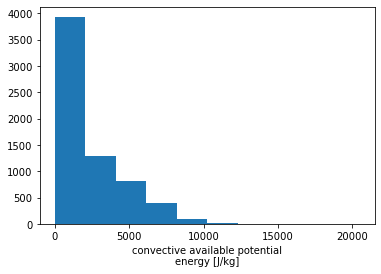

In [125]:
dsaug.CAPE[ abs(dsaug.YYYY-2000)<10 ].plot.hist()

In [193]:
#dsaug.sel(time=slice(2000000000.,3e10),MM=slice(7,9))

(array([3.000e+00, 1.000e+01, 1.700e+01, 4.100e+01, 8.400e+01, 2.700e+02,
        7.250e+02, 1.368e+03, 2.887e+03, 4.162e+03, 5.259e+03, 4.905e+03,
        3.979e+03, 2.826e+03, 1.766e+03, 9.450e+02, 4.650e+02, 2.010e+02,
        9.800e+01, 3.100e+01, 1.600e+01, 6.000e+00, 2.000e+00]),
 array([397.     , 412.0435 , 427.08694, 442.13043, 457.17392, 472.21738,
        487.26086, 502.30435, 517.34784, 532.3913 , 547.43475, 562.4783 ,
        577.5217 , 592.56525, 607.6087 , 622.65216, 637.6957 , 652.73914,
        667.7826 , 682.8261 , 697.86957, 712.913  , 727.95654, 743.     ],
       dtype=float32),
 <BarContainer object of 23 artists>)

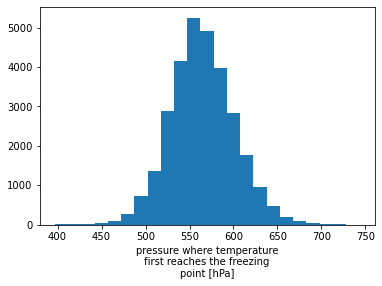

In [195]:
# Freezing level pressure: a histogram, all data (no selection)
ds25.FrzPress.plot.hist(bins=23)

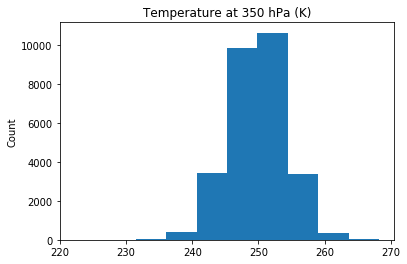

In [24]:
ds25.Data[:,26,3].plot.hist() 
## 3 is "reported temperature", 25 is 350 hPa 
plt.title('Temperature at 350 hPa (K)');

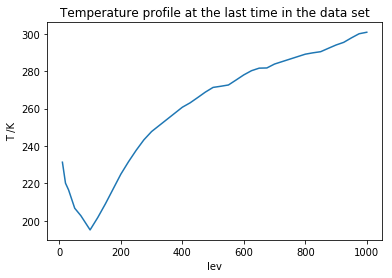

In [33]:
ds25.Data[-1,:,3].plot() 
## 3 is "reported temperature", 25 is 350 hPa 
plt.ylabel('T /K')
plt.title('Temperature profile at the last time in the data set');

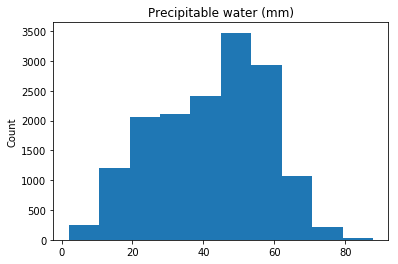

In [25]:
ds25.PW.plot.hist()
plt.title('Precipitable water (mm)');

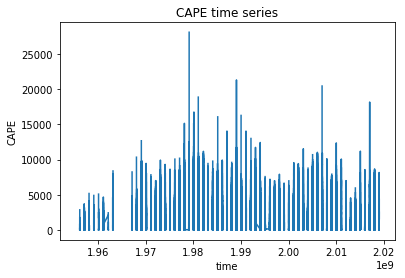

In [27]:
ds25.CAPE.plot()
plt.title('CAPE time series'); # looks like some problematic cases need examining